<a href="https://colab.research.google.com/github/sgauthamr2001/cvi-session-1/blob/master/Image_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the github repo 

In [ ]:
!git clone https://github.com/sgauthamr2001/cvi-session-1.git

Changing the current directory to one with images 

In [ ]:
%cd '/content/cvi-session-1/Filtering/'

# Introduction:
   Images are made of grids known as pixels. Each pixel has a value which defines the colour of the pixel. As we have seen in colour spaces, each pixel is defined with a vector with three values each for Red, Green, Blue. To make things simple, let us only consider gray scale image i.e., each pixel has a value between 0 and 255 with 0 being black and 255 being white.
   
  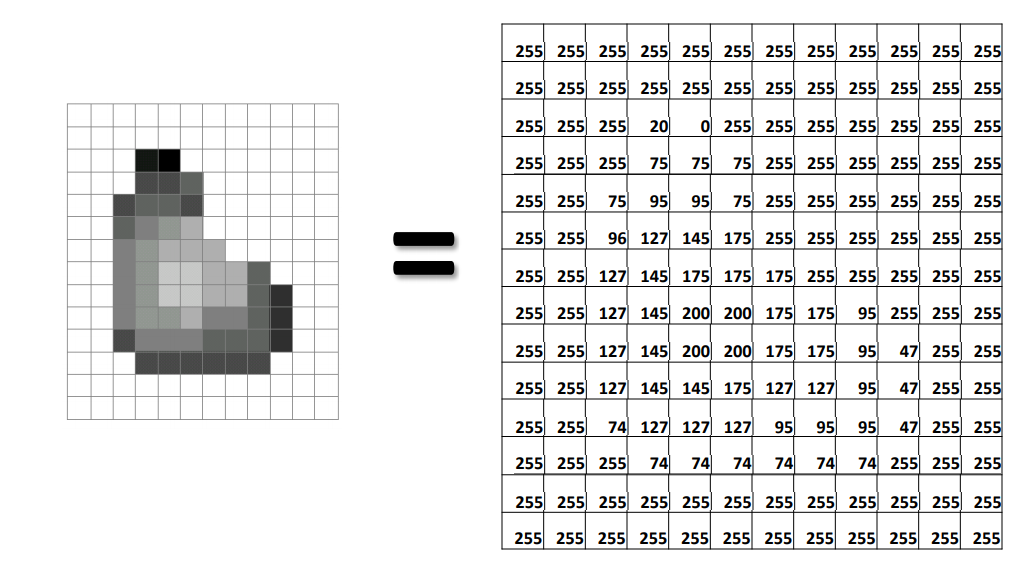
 
 The filtering of images is done using 2D matrix known as kernel. This kernel acts like a filter and replaces each pixel by the weighted mean of its neighbours. First lets look at 1D filter kernel. Let the filter be:


<h3 align='center'>$\large \frac{1}{5} \begin{bmatrix}1 & 1 & 1 & 1 & 1 \end{bmatrix}$</h3>

The first discrete point graph below has sudden rises in values in some places. The second graph is the graph of points obtained after using the above 1D filter. The above filter basically takes 5 consecutive values from the graph, takes the average of those five values and replaces this average value at the centered point.
 
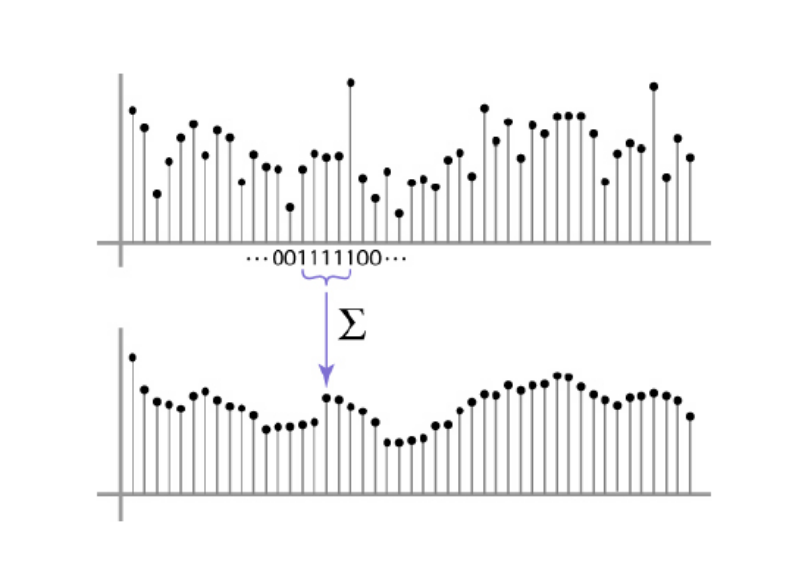
   
   We can see that the function got smoother that the original after filtering. The same thing is done in case of images except that the filter is a 2D matrix and the function values are also in 2D.
   
   Similar to the 1D case, if we want to take the average of neighbour values in a 2D set of values, the filter will be:
   <h3 align='center'>$ \frac{1}{9} \begin{bmatrix}1 & 1 & 1  \\ 1 & 1 & 1  \\ 1 & 1 & 1  \end{bmatrix}$</h3>
   
 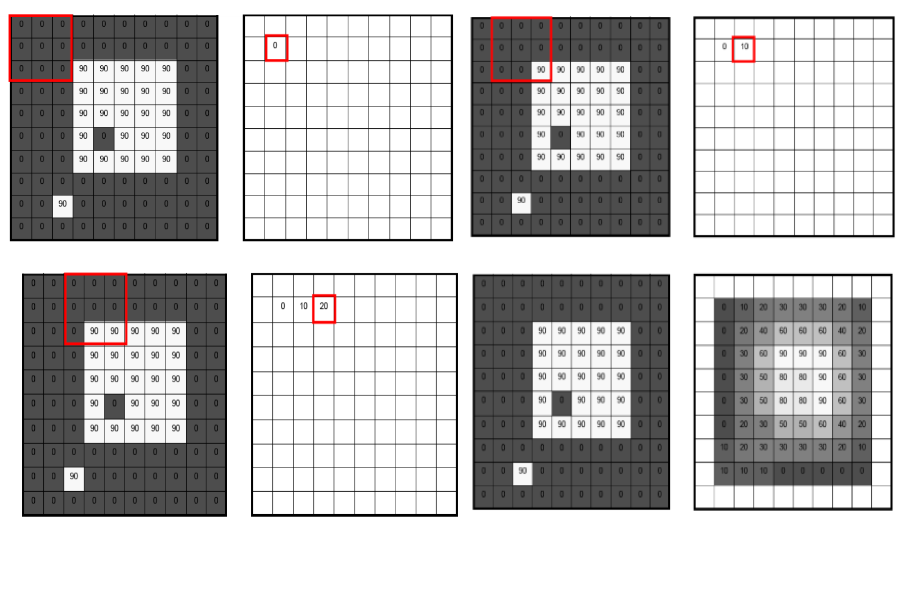
   
   This process of multiplying the filter with the 2D image is known as convolution.

In [ ]:
from IPython.display import Image
Image(filename='parrot_gray.jpg')


  
  As for one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters(HPF1)etc.
  A LPF helps in removing noise, or blurring the image. A HPF filters helps in finding edges in an image.
OpenCV provides a function, cv2.filter2D(), to convolve a kernel with an image.

Filtering with the above kernel results in the following being performed: for each pixel, a 3x3 window is centered on
this pixel, all pixels falling within this window are summed up, and the result is then divided by 9. This equates to
computing the average of the pixel values inside that window. This operation is performed for all the pixels in the
image to produce the output filtered image. Try this code and check the result:





In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#Reading the image
img = cv2.imread('parrot_gray.jpg')

#Creating the Averaging Kernel
kernel = np.ones((9,9),np.float32)/81

#Convolving it with the given image
dst = cv2.filter2D(img,-1,kernel)
#Plotting them

plt.plot(1),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()
plt.plot(2),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Blurring (Image Smoothing):

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It
actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this
is filter is applied. (Well, there are blurring techniques which do not blur edges). OpenCV provides mainly four types
of blurring techniques.


### 1. Averaging
This is done by convolving the image with a normalized box filter or the averaging filter talked about before. It simply takes the average of all the pixels
under kernel area and replaces the central element with this average. This is done by the function cv2.blur() or
cv2.boxFilter(). We should specify the width and height of kernel. This is the same thing we described in the above section.
A 3x3 normalized box filter would look like this:


<h3 align='center'>$ \frac{1}{9} \begin{bmatrix}1 & 1 & 1  \\ 1 & 1 & 1  \\ 1 & 1 & 1  \end{bmatrix}$</h3>


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#Reading the image
img = cv2.imread('parrot_gray.jpg')
#creating the averaged image using cv2.blur()
blur = cv2.blur(img,(11,11))
#Plotting the images
plt.plot(1),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()
plt.plot(2),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 2. Gaussian Filtering
In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done 
with the function, cv2.GaussianBlur(). 
     We should specify the width and height of the kernel which should be positive and
odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If
only sigmaX is specified, sigmaY is taken as equal to sigmaX. 

<h3 align='center'>$ \frac{1}{16} \begin{bmatrix}1 & 2 & 1  \\ 2 & 4 & 2  \\ 1 & 2 & 1  \end{bmatrix}$</h3>

If both are given as zeros, they are calculated from the
kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.
If you want, you can create a Gaussian kernel with the function, cv2.getGaussianKernel()

In [ ]:
img = cv2.imread('parrot_gray.jpg')
blur_gaus = cv2.GaussianBlur(img,(11,11),0)
#Plotting the images
plt.plot(1),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()
plt.plot(2),plt.imshow(blur_gaus),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Comparing Outputs of Gaussian filter and Averaging Filter
plt.plot(1),plt.imshow(blur),plt.title('Averaging Output')
plt.xticks([]), plt.yticks([])
plt.show()
plt.plot(2),plt.imshow(blur_gaus),plt.title('Gaussian Output')
plt.xticks([]), plt.yticks([])
plt.show()

Instead of cv2.blur() use cv2.GaussianBlur()

### 3. Median Filtering:
Here, the function cv2.medianBlur() computes the median of all the pixels under the kernel window and the central
pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise. One interesting
thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which
may not exist in the original image. 

However this is not the case in median filtering, since the central element is always
replaced by some pixel value in the image. This reduces the noise effectively. The kernel size must be a positive odd
integer.

Here a 50% noise is added to our original image and median filter is then used

In [ ]:
img_sp = cv2.imread('salt-and-pepper-parrot_gray.jpg')
blur = cv2.medianBlur(img_sp,9)
#Plotting the images
plt.plot(1),plt.imshow(img_sp),plt.title('Original+Noise')
plt.xticks([]), plt.yticks([])
plt.show()
plt.plot(2),plt.imshow(blur),plt.title('Filtered')
plt.xticks([]), plt.yticks([])
plt.show()

### 4. Bilateral Filtering:
 One of the biggest problems with the previous filters is that they blur the edges also.But bilateral Filtering is very effective in removing the noise as well as preseving the edges.
 The bilateral filtering is done by using the Gaussain kernel in space domain bout also uses one more multiplicative component which is Gaussian with difference in intensities as the input.The Gaussian function of space makes sure that
only pixels are ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity
domain (a Gaussian function of intensity differences) ensures that only those pixels with intensities similar to that of
the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value. As a result, this method
preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge, and
therefore exhibiting large intensity variations when compared to the central pixel, will not be included for blurring

In [ ]:
#The cv2 function used is cv2.bilateralFilter()
#arguments used are
"""
Input array src = source image
int d = filter size
double sigmacolour = Gaussian sigma for intensity differences 
double sigmaspace =  Gaussian sigma for the coordinates in the image
int borderType = BORDER_DEFAULT
"""
blur = cv2.bilateralFilter(img,11,75,75)
plt.plot(1),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()
plt.plot(2),plt.imshow(blur_gaus),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.show()
plt.plot(3),plt.imshow(blur),plt.title('Bilateral')
plt.xticks([]), plt.yticks([])
plt.show()
#Here the kernal size is 9X9 with sigmacolour and sigmaspace equal to 75

## Sharpening an Image

Sharpening of image is to make the details of an image more prominent.This can be done by simple application of filters and basic algebra.

Let us look at the following filter:
<h3 align='center'>$  \begin{bmatrix}0 & 0 & 0  \\ 0 & 1 & 0  \\ 0 & 0 & 0  \end{bmatrix}$</h3>

When we convolve the above filter with an image, what image do we get as output?



When an image is smoothed out, the edges of the image are almost removed and smoothened. Therefore the output image lacks few details of the original image. Lets look at the details removed from the parrot image when an averaging filter is applied. This detail is just obtained by subtracting the pixel values of the original image with the corresponding pixel values of smoothed out image.
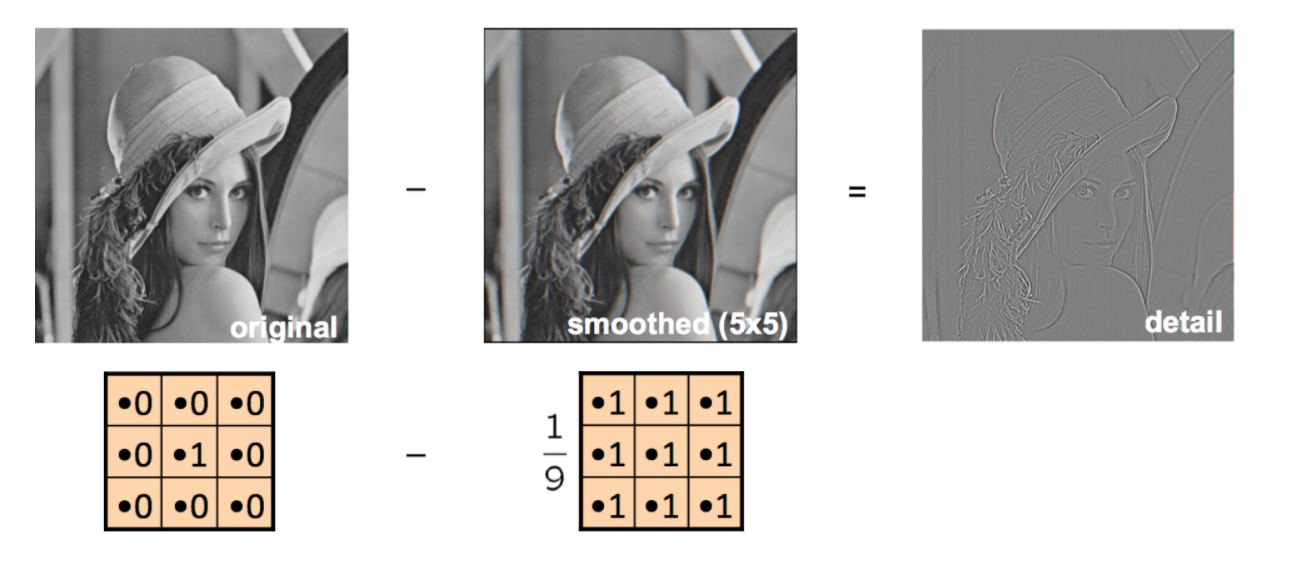


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#Reading the image
img = cv2.imread('parrot_gray.jpg')

#Creating the Details Kernel
impulse = np.zeros((9,9))
impulse[5][5] = 1
kernel = impulse - np.ones((9,9),np.float32)/81

#Convolving it with the given image
details = cv2.filter2D(img,-1,kernel)
#Plotting them

plt.plot(1),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()
plt.plot(2),plt.imshow(details),plt.title('Details')
plt.xticks([]), plt.yticks([])
plt.show()


Now if this details img is added to the original image, the details in the original picture will be doubled. Therefore, the details in the original image are increased and thus the image is sharpened.
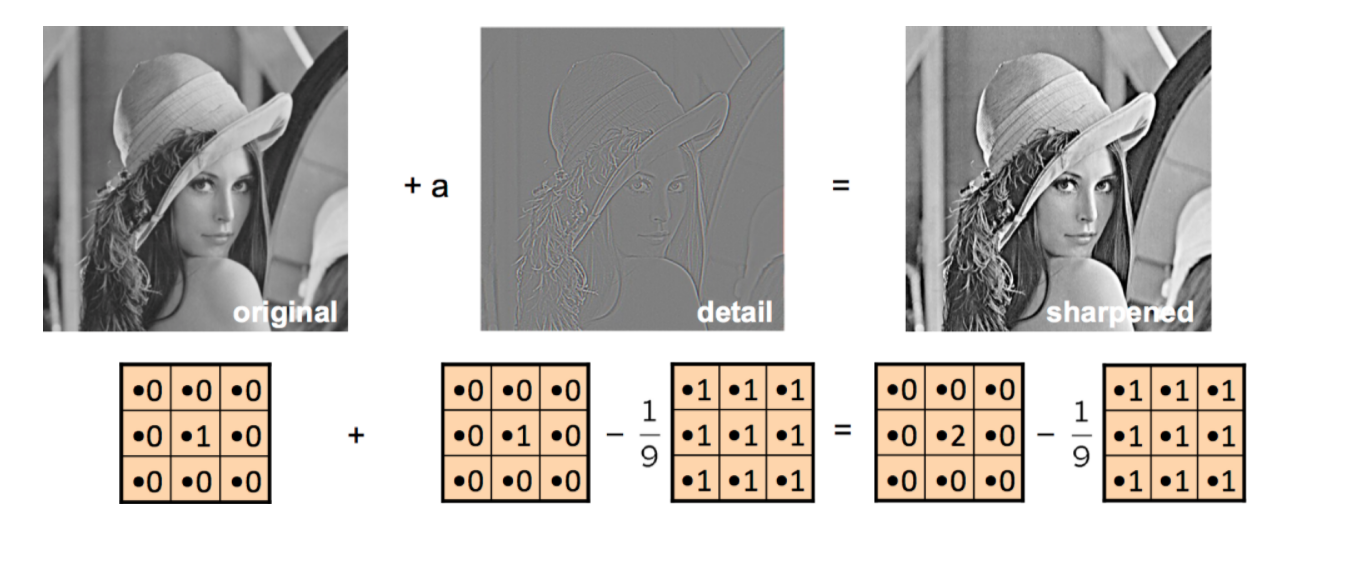

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#Reading the image
img = cv2.imread('parrot_gray.jpg')

#Creating the Sharpening Kernel
impulse = np.zeros((9,9))
impulse[5][5] = 1
kernel = 2*impulse - np.ones((9,9),np.float32)/81

#Convolving it with the given image
sharp = cv2.filter2D(img,-1,kernel)

#Plotting them

plt.plot(1),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()
plt.plot(3),plt.imshow(sharp),plt.title('Sharpened')
plt.xticks([]), plt.yticks([])
plt.show()

# Further Readings:
[MIT BF Course](http://people.csail.mit.edu/sparis/bf_course/)

[IITD BF Course](www.cse.iitd.ernet.in/~pkalra/col783/bilateral-filtering.pdf)

[Machine Vision Bilateral Filtering](http://www.cse.usf.edu/~r1k/MachineVisionBook/MachineVision.files/MachineVision_Chapter4.pdf)